- for more information -> https://data.calgary.ca/Environment/Solar-Energy-Production/ytdn-2qsp
- API docs -> https://dev.socrata.com/foundry/data.calgary.ca/ytdn-2qsp
- https://data.calgary.ca/resource/ytdn-2qsp.json

In [98]:
import pandas as pd 
import json
import requests

In [2]:
df = pd.read_csv("data/solar-energy-production.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281145 entries, 0 to 281144
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              281145 non-null  object 
 1   id                281145 non-null  int64  
 2   address           281145 non-null  object 
 3   date              281145 non-null  object 
 4   kWh               281145 non-null  float64
 5   public_url        281145 non-null  object 
 6   installationDate  281145 non-null  object 
 7   uid               281145 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 17.2+ MB


In [4]:
# list all the locations in the dataset
locations = df["name"].unique().tolist()
print(locations)

# a map of the locations can be found here -> https://data.calgary.ca/dataset/City-of-Calgary-Solar-Photovoltaic-Sites/vrdj-ycb5
df_sites = pd.read_csv("data/solar-sites.csv")
df_sites.head()

['Calgary Fire Hall Headquarters', 'Whitehorn Multi-Service Centre', 'Southland Leisure Centre', 'Hillhurst Sunnyside Community Association', 'Glenmore Water Treatment Plant', 'City of Calgary North Corporate Warehouse', 'Richmond - Knob Hill Community Hall', 'CFD Firehall #7', 'Manchester Building M', 'Telus Spark', 'Bearspaw Water Treatment Plant']


,id,name,address_orig,address,latitude,longitude,location,installationDate,public_url,manufacturerName,modelName,maximumPower
0,NaN,Fire Station No. 22 - Temple,7199 Temple DR NW,7199 TEMPLE DR NE,51.091770,-113.957493,"(51.09177006, -113.9574929)",2011/01/01,NaN,NaN,NaN,NaN
1,NaN,Fire Station No. 24 - Cedarbrae,2607 106 AVE SW,2607 106 AV SW,50.957431,-114.121390,"(50.95743078, -114.1213903)",2011/01/01,NaN,NaN,NaN,NaN
2,NaN,69th St. Park and Ride,7085 17 AVE SW,7085 17 AV SW,51.037227,-114.189256,"(51.03722709, -114.1892563)",2011/01/01,NaN,NaN,NaN,NaN
3,NaN,Fire Station No. 8 – Rosscarrock,1720 45 ST SW,1720 45 ST SW,51.038673,-114.152118,"(51.03867255, -114.1521183)",2011/01/01,NaN,NaN,NaN,NaN
4,NaN,Fire Station No. 5 – South Calgary,3129 14 ST SW,3129 14 ST SW,51.026009,-114.094948,"(51.0260092, -114.0949484)",2012/01/01,NaN,NaN,NaN,NaN


![Map of Calagry](calagry-sites.png "Map of Calagry")

In [5]:
df_fire_hall_hq = df.loc[df["name"] == "Calgary Fire Hall Headquarters"]
df_fire_hall_hq = df_fire_hall_hq.reset_index(drop=True)
df_fire_hall_hq = df_fire_hall_hq.sort_values(by="date")
df_fire_hall_hq.tail(5)

,name,id,address,date,kWh,public_url,installationDate,uid
26978,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2023/08/19 08:00:00 PM,0.107,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062023-08-19 20:00:00
26967,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2023/08/19 09:00:00 AM,4.105,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062023-08-19 09:00:00
26968,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2023/08/19 10:00:00 AM,7.015,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062023-08-19 10:00:00
26969,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2023/08/19 11:00:00 AM,7.429,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062023-08-19 11:00:00
26970,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2023/08/19 12:00:00 PM,9.362,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062023-08-19 12:00:00


In [6]:
import plotly.express as px

# x and y given as DataFrame columns
fig = px.scatter(
      df_fire_hall_hq, 
      x="date", y="kWh", 
      opacity=0.8, 
      width=5000, height=400, 
      color_discrete_sequence=px.colors.qualitative.Dark24
)
fig.update_layout(
    plot_bgcolor="#e6e6e6",
    paper_bgcolor="#ffffff"
)
fig.show()


In [7]:
df["name"].unique()

array(['Calgary Fire Hall Headquarters', 'Whitehorn Multi-Service Centre',
       'Southland Leisure Centre',
       'Hillhurst Sunnyside Community Association',
       'Glenmore Water Treatment Plant',
       'City of Calgary North Corporate Warehouse',
       'Richmond - Knob Hill Community Hall', 'CFD Firehall #7',
       'Manchester Building M', 'Telus Spark',
       'Bearspaw Water Treatment Plant'], dtype=object)

In [8]:
min_date = min(df_fire_hall_hq["date"])
max_date = max(df_fire_hall_hq["date"])

print(min_date)
print(max_date)

2016/11/24 02:00:00 PM
2023/08/19 12:00:00 PM


## Loading weather data

In [9]:
# import requests

# fire_hall_hq_location = ("51.01618884", "-114.036667015348") # lat, long
# url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/51.01618884%2C%20-114.036667015348/2020-10-20/2023-08-20?unitGroup=metric&include=hours&key=GWNLWN96VNZPG2ECFGKSU66N8&contentType=json"
# response = requests.get(url)
# print(response.text)

In [10]:
# weather_fire_hall_hq_102020_082023 = response.json()
# print(json.dumps(weather_fire_hall_hq_102020_082023, indent=4))

In [11]:
# with open("data/weather_fire_hall_hq_082022_082023.json", "w") as f:
#     json.dump(weather_fire_hall_hq_102020_082023, f)

In [12]:
# filter by date
df_fire_hall_hq_filtered = df_fire_hall_hq[df_fire_hall_hq["date"] >= "2020/10/20 01:00:00 PM"]

# Convert the "date" column to a datetime object
df_fire_hall_hq_filtered["date"] = pd.to_datetime(df_fire_hall_hq_filtered["date"], format="%Y/%m/%d %I:%M:%S %p")

# Sort the dataframe based on the datetime
df_fire_hall_hq_filtered = df_fire_hall_hq_filtered.sort_values(by="date")

# change date to perform filtering operations, rename for additional date column containing only the date
df_fire_hall_hq_filtered = df_fire_hall_hq_filtered.rename(columns={"date": "datetime"})
df_fire_hall_hq_filtered["datetime"] = pd.to_datetime(df_fire_hall_hq_filtered["datetime"])

# separate date and time
df_fire_hall_hq_filtered["date"] = df_fire_hall_hq_filtered["datetime"].dt.date
df_fire_hall_hq_filtered["time"] = df_fire_hall_hq_filtered["datetime"].dt.time

df_fire_hall_hq_filtered.head(3)

C:\Users\leopu\AppData\Local\Temp\ipykernel_16448\2249662190.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,id,address,datetime,kWh,public_url,installationDate,uid,date,time
17760,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2020-10-20 10:00:00,0.103,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062020-10-20 10:00:00,2020-10-20,10:00:00
17761,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2020-10-20 11:00:00,0.629,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062020-10-20 11:00:00,2020-10-20,11:00:00
17926,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2020-10-20 12:00:00,1.464,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062020-10-20 12:00:00,2020-10-20,12:00:00


In [14]:
list_names = [
    "temp", "feelslike", "humidity", 
    "dew", "snow", "snowdepth", 
    "windgust", "windspeed", "winddir", 
    "pressure", "visibility", "cloudcover", 
    "solarradiation", "solarenergy", "uvindex", 
    "conditions", "stations"
]

list_collection = {name: [] for name in list_names}

In [15]:
date_list = df_fire_hall_hq_filtered["date"].tolist()
time_list = df_fire_hall_hq_filtered["time"].tolist()

# reverse the list 
date_list = list(reversed(date_list))
time_list = list(reversed(time_list))

In [17]:
with open("data/weather_fire_hall_hq_082022_082023.json", "r") as f:
    weather_data = json.load(f)

enriched_dates = []
# first loop through all dates and times in the dataframe 
for d, t in zip(date_list, time_list):
    # only use the date, not the time (it's always 00:00:00)
    d = str(d)[:10]

    # then loop through all the days in the weather json
    for w in range(len(weather_data["days"])):
        w = int(w)

        #print(str(d)[:10])
        #print(weather_data["days"][w]["datetime"])
        
        # if dates are identical ...
        if weather_data["days"][w]["datetime"] == d:

            #print("Match!")
            enriched_dates.append(d)
            # ... loop through hours
            for h in range(len(weather_data["days"][int(w)]["hours"])):

                # if hours are identical, append weather info 
                if weather_data["days"][w]["hours"][h]["datetime"] == str(t):

                    # by looping through all the list names
                    for l in list_names:
                        list_collection[l].append(
                            weather_data["days"][w]["hours"][h][l]
                        )

In [18]:
for l in list_names:
    df_fire_hall_hq_filtered[l] = list_collection[l][::-1] # make sure to reverse the list, as the weather data is in a different order

In [19]:
# Assuming df is your DataFrame and 'datetime' is your column
#df['datetime'] = pd.to_datetime(df['datetime'])

# Create 'hour of the day', 'day of the month' and 'day of the year' columns
df_fire_hall_hq_filtered['hour_of_day'] = df_fire_hall_hq_filtered['datetime'].dt.hour
df_fire_hall_hq_filtered['day_of_month'] = df_fire_hall_hq_filtered['datetime'].dt.day
df_fire_hall_hq_filtered['day_of_year'] = df_fire_hall_hq_filtered['datetime'].dt.dayofyear

# Now 'hour_of_day', 'day_of_month' and 'day_of_year' columns are ready to be used in your ML model


In [20]:
df_fire_hall_hq_filtered.head(3)

,name,id,address,datetime,kWh,public_url,installationDate,uid,date,time,...,visibility,cloudcover,solarradiation,solarenergy,uvindex,conditions,stations,hour_of_day,day_of_month,day_of_year
17760,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2020-10-20 10:00:00,0.103,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062020-10-20 10:00:00,2020-10-20,10:00:00,...,64.0,88.0,32.0,0.1,0.0,Partially cloudy,"[71877099999, CPST, 71495099999, 71526099999, ...",10,20,294
17761,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2020-10-20 11:00:00,0.629,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062020-10-20 11:00:00,2020-10-20,11:00:00,...,64.0,88.0,174.0,0.6,2.0,Partially cloudy,"[71877099999, CPST, 71495099999, 71526099999, ...",11,20,294
17926,Calgary Fire Hall Headquarters,314106,1212 42 AV SE,2020-10-20 12:00:00,1.464,https://monitoringpublic.solaredge.com/solared...,2016/11/07,3141062020-10-20 12:00:00,2020-10-20,12:00:00,...,60.0,40.0,353.0,1.3,4.0,"Snow, Rain, Partially cloudy","[71877099999, CPST, 71495099999, 71526099999, ...",12,20,294


In [21]:
df_fire_hall_hq_filtered.describe()

,id,kWh,temp,feelslike,humidity,dew,snow,snowdepth,windgust,windspeed,winddir,pressure,visibility,cloudcover,solarradiation,solarenergy,uvindex,hour_of_day,day_of_month,day_of_year
count,12273.0,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12272.000000,12272.000000,9056.000000,12273.000000,12273.000000,12272.000000,12267.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000,12273.000000
mean,314106.0,4.269620,9.775084,7.948578,52.122554,-0.962487,0.003868,0.355812,26.542403,14.478734,202.114772,1015.553479,36.343377,64.840373,251.362324,0.904620,2.488063,12.917868,15.722154,177.184877
std,0.0,4.324022,11.160792,13.126509,20.983969,8.971522,0.049811,0.989695,14.198957,8.324912,107.314139,8.029290,21.257523,32.859692,234.874183,0.846691,2.391050,3.977110,8.795503,90.592387
min,314106.0,0.001000,-30.200000,-43.500000,8.470000,-35.100000,0.000000,0.000000,0.400000,0.100000,1.000000,981.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000
25%,314106.0,0.533000,2.000000,-1.200000,34.680000,-7.500000,0.000000,0.000000,14.400000,8.400000,127.000000,1010.500000,19.000000,27.400000,51.000000,0.200000,1.000000,10.000000,8.000000,108.000000
50%,314106.0,2.580000,10.800000,10.800000,50.100000,-0.800000,0.000000,0.000000,27.700000,12.900000,208.000000,1015.600000,32.000000,88.000000,172.000000,0.600000,2.000000,13.000000,16.000000,172.000000
75%,314106.0,7.429000,18.100000,18.100000,68.660000,6.700000,0.000000,0.190000,36.800000,18.900000,293.000000,1020.400000,60.000000,90.000000,413.000000,1.500000,4.000000,16.000000,23.000000,240.000000
max,314106.0,16.378000,35.900000,34.200000,100.000000,17.400000,2.800000,12.400000,98.300000,59.400000,360.000000,1049.900000,72.000000,100.000000,984.000000,3.500000,10.000000,21.000000,31.000000,366.000000


In [22]:
df_fire_hall_hq_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12273 entries, 17760 to 26978
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              12273 non-null  object        
 1   id                12273 non-null  int64         
 2   address           12273 non-null  object        
 3   datetime          12273 non-null  datetime64[ns]
 4   kWh               12273 non-null  float64       
 5   public_url        12273 non-null  object        
 6   installationDate  12273 non-null  object        
 7   uid               12273 non-null  object        
 8   date              12273 non-null  object        
 9   time              12273 non-null  object        
 10  temp              12273 non-null  float64       
 11  feelslike         12273 non-null  float64       
 12  humidity          12273 non-null  float64       
 13  dew               12273 non-null  float64       
 14  snow              

C:\Users\leopu\AppData\Local\Temp\ipykernel_16448\821110391.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



                id       kWh      temp  feelslike  humidity       dew  \
id             NaN       NaN       NaN        NaN       NaN       NaN   
kWh            NaN  1.000000  0.446891   0.436194 -0.449987  0.214864   
temp           NaN  0.446891  1.000000   0.992767 -0.505005  0.806204   
feelslike      NaN  0.436194  0.992767   1.000000 -0.483318  0.815300   
humidity       NaN -0.449987 -0.505005  -0.483318  1.000000  0.082963   
dew            NaN  0.214864  0.806204   0.815300  0.082963  1.000000   
snow           NaN -0.059240 -0.101206  -0.106823  0.097176 -0.061947   
snowdepth      NaN -0.184757 -0.432621  -0.439398  0.098116 -0.430538   
windgust       NaN  0.004720  0.020408  -0.025936 -0.198188 -0.116132   
windspeed      NaN  0.058961  0.023895  -0.040495 -0.180890 -0.102902   
winddir        NaN -0.103398 -0.067947  -0.065644  0.012999 -0.067957   
pressure       NaN -0.022713 -0.238582  -0.235502  0.140070 -0.169042   
visibility     NaN  0.160868 -0.075049  -0.060020 -

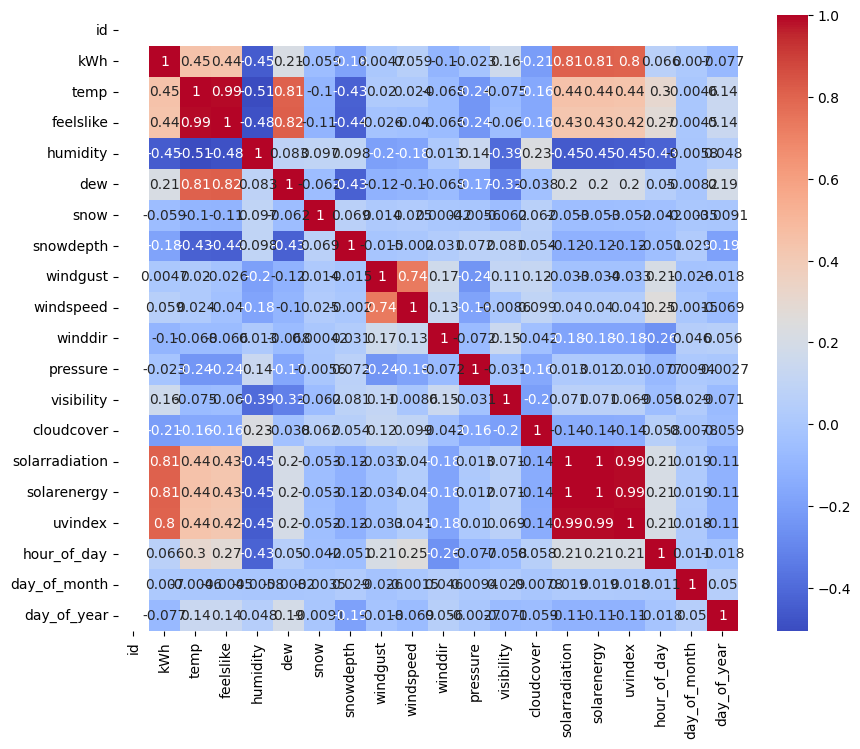

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = df_fire_hall_hq_filtered.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [69]:
df_fire_hall_hq_filtered["target"] = df_fire_hall_hq_filtered["kWh"].shift(-24) # Move target one forward in order to use features to predict future 
df_fire_hall_hq_filtered["target"] = df_fire_hall_hq_filtered["target"].fillna(0)

In [70]:
df_fire_hall_hq_filtered = df_fire_hall_hq_filtered.fillna(0)

In [71]:
df_fire_hall_hq_filtered[["kWh", "target"]].head()

,kWh,target
17760,0.103,0.037
17761,0.629,0.094
17926,1.464,0.139
17927,4.099,0.092
17928,5.332,0.074


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score, mean_squared_error

In [73]:
model_features = ["hour_of_day", "day_of_month", "day_of_year", "temp", "feelslike", "humidity", "dew", "snow", "snowdepth", "windgust", "windspeed",
                  "winddir", "pressure", "visibility", "cloudcover", "solarradiation", "solarenergy", "uvindex"]

X = df_fire_hall_hq_filtered[model_features]
y = df_fire_hall_hq_filtered["target"].tolist()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [76]:
y_pred = dt.predict(X_test)

In [83]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.4467333848011845
10.515939168929929


In [79]:
feature_importances = dt.feature_importances_

for fi, c in zip(feature_importances, model_features):
    print(f"{c} -> {fi}")

hour_of_day -> 0.3060868719400702
day_of_month -> 0.02468063095516223
day_of_year -> 0.3297734845208225
temp -> 0.02170995365470284
feelslike -> 0.019411549480800445
humidity -> 0.025699596652069067
dew -> 0.040147223373093906
snow -> 0.0019212843245329163
snowdepth -> 0.012154360952613593
windgust -> 0.019783074122022723
windspeed -> 0.02542824499165506
winddir -> 0.030479217090003938
pressure -> 0.03462311722584727
visibility -> 0.018443411240591467
cloudcover -> 0.011935658690235962
solarradiation -> 0.06945685727964218
solarenergy -> 0.004662334680189324
uvindex -> 0.003603128825944322


## Boosted tree model

In [97]:
from xgboost import XGBRegressor

xgb = XGBRegressor().fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print(r2_score(y_test, y_pred_xgb.clip(0)))
print(mean_squared_error(y_pred_xgb, y_test))

0.7079646222521807
5.576259237567054


In [91]:
import plotly.graph_objects as go

predictions = y_pred_xgb.tolist()

# Create a trace for the predictions
trace0 = go.Scatter(
    x=list(range(len(predictions))),
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='rgba(0,0,255,0.3)')  # Blue color with 50% opacity
)

# Create a trace for the targets
trace1 = go.Scatter(
    x=list(range(len(y_test))),
    y=y_test,
    mode='lines',
    name='Targets',
    line=dict(color='rgba(255,0,0,0.3)')  # Red color with 50% opacity
)

data = [trace0, trace1]

# Define the layout
layout = go.Layout(
    title='Predictions vs Targets',
    xaxis=dict(title='Index'),
    yaxis=dict(title='Value')
)

# Create the figure and add the traces
fig = go.Figure(data=data, layout=layout)

# Update xaxis properties
fig.update_xaxes(range=[0, len(predictions)], autorange=False)

# Update layout properties
fig.update_layout(
    autosize=True,
    # width=1000,  # You can adjust this value to make your plot wider
    # height=800,
)

# Show the figure
fig.show()


## Stream in new data

In [100]:
# get weather data for current day
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/51.01618884%2C%20-114.036667015348/today?unitGroup=metric&include=hours&key=GWNLWN96VNZPG2ECFGKSU66N8&contentType=json"
response = requests.get(url)
print(response.json())

{'queryCost': 1, 'latitude': 51.01618884, 'longitude': -114.036667015348, 'resolvedAddress': '51.01618884, -114.036667015348', 'address': '51.01618884, -114.036667015348', 'timezone': 'America/Edmonton', 'tzoffset': -6.0, 'days': [{'datetime': '2023-09-17', 'datetimeEpoch': 1694930400, 'tempmax': 25.2, 'tempmin': 9.6, 'temp': 17.9, 'feelslikemax': 25.2, 'feelslikemin': 8.7, 'feelslike': 17.8, 'dew': -0.8, 'humidity': 29.9, 'precip': 0.0, 'precipprob': 6.0, 'precipcover': 0.0, 'preciptype': None, 'snow': 0.0, 'snowdepth': 0.0, 'windgust': 43.6, 'windspeed': 28.8, 'winddir': 257.8, 'pressure': 1007.2, 'cloudcover': 43.1, 'visibility': 18.0, 'solarradiation': 178.9, 'solarenergy': 15.3, 'uvindex': 7.0, 'severerisk': 10.0, 'sunrise': '07:14:22', 'sunriseEpoch': 1694956462, 'sunset': '19:46:00', 'sunsetEpoch': 1695001560, 'moonphase': 0.09, 'conditions': 'Partially cloudy', 'description': 'Partly cloudy throughout the day.', 'icon': 'partly-cloudy-day', 'stations': ['CPST', 'CWXA', 'CYBW', 

In [131]:
url = f"https://data.calgary.ca/resource/ytdn-2qsp.json?date=2023-09-17T14:30:00.000&app-token={calgary_app_token}" #name=Calgar%20Fire%20Hall%20Headquarters&
response = requests.get(url)
print(response.json())

{'error': True, 'message': 'Unrecognized arguments [app-token]'}


In [151]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.calgary.ca", calgary_app_token)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.calgary.ca,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ytdn-2qsp", where="date='2023-09-16'")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)